# Writing an iterator to load data in chunks (1)
Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do *pd.read_csv(filename, chunksize=100)*. This creates an iterable **reader object**, which means that you can use *next()* on it.

In this exercise, you will read a file in small DataFrame chunks with read_csv(). You're going to use the World Bank Indicators data 'ind_pop.csv', available in your current directory, to look at the urban population indicator for numerous countries and years.

### Instructions
* Use pd.read_csv() to read in 'ind_pop.csv' in chunks of size 10. Assign the result to df_reader.
* Print the first two chunks from df_reader.

In [1]:
import pandas as pd

In [2]:
# Initialize reader object: df_reader
#df_reader = pd.read_csv('ind_pop.csv', chunksize=10) DON'T HAVE THEIR DATASET
df_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

# Writing iterator to load data in chunks (2)
In the previous exercise, you used read_csv() to read in DataFrame chunks from a large dataset. In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, you will create another DataFrame composed of only the rows from a specific country. You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

### Instructions
* Use pd.read_csv() to read in the file in 'ind_pop_data.csv' in chunks of size 1000. Assign the result to urb_pop_reader.
* Get the **first** DataFrame chunk from the iterable urb_pop_reader and assign this to df_urb_pop.
* Select only the rows of df_urb_pop that have a 'CountryCode' of 'CEB'. To do this, compare whether df_urb_pop['CountryCode'] is **equal** to 'CEB' within the square brackets in df_urb_pop[____].
* Using zip(), zip together the 'Total Population' and 'Urban population (% of total)' columns of df_pop_ceb. Assign the resulting zip object to pops.

In [3]:
# Initialize reader object: urb_pop_reader
#urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000) DON'T HAVE THIS DATASET
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


In [4]:
# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

[(91401583.0, 44.507921139002597), (92237118.0, 45.206665319194002), (93014890.0, 45.866564696018003), (93845749.0, 46.5340927663649), (94722599.0, 47.208742980352604)]


# Writing an iterator to load data in chunks (3)
Starting from the code of the previous exercise, you will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that you generated earlier. Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple. Furthermore, because the 2nd element is a percentage, you need to divide the entire result by 100, or alternatively, multiply it by 0.01.

You will also plot the data from this new column to create a visualization of the urban population data.

The packages pandas and matplotlib.pyplot have been imported as pd and plt respectively for your use.

In [5]:
import matplotlib.pyplot as plt

### Instructions
* Write a list comprehension to generate a list of values from pops_list for the new column 'Total Urban Population'. The _output expression_ should be the product of the first and second element in each tuple in pops_list. Because the 2nd element is a percentage, you also need to either multiply the result by 0.01 or divide it by 100. In addition, note that the column 'Total Urban Population' should only be able to take on integer values. To ensure this, make sure you cast the _output expression_ to an integer with int().
* Create a _scatter_ plot where the x-axis are values from the 'Year' column and the y-axis are values from the 'Total Urban Population' column.

C:\Users\Victoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


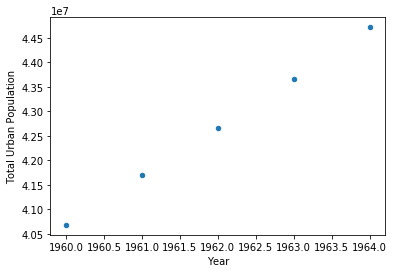

In [6]:
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(num[0]*num[1]*0.01) for num in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

# Writing an iterator to load data in chunks (4)
In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot have been imported as pd and plt respectively for your use.

### Instructions
* Initialize an empty DataFrame data using pd.DataFrame().
* In the for loop, iterate over urb_pop_reader to be able to process all the DataFrame chunks in the dataset.
* Using the method append() of the DataFrame data, append df_pop_ceb to data.

C:\Users\Victoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


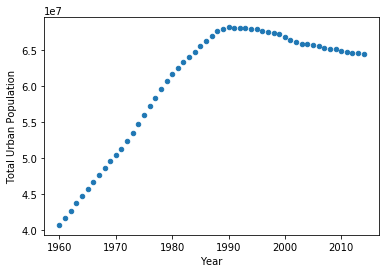

In [7]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

# Writing an iterator to load data in chunks (5)
This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

* Loading of the file chunk by chunk,
* Creating the new column of urban population values, and
* Plotting the urban population data.

That's a lot of work, but the function now makes it convenient to repeat the same process for whatever file and country code you want to process and visualize!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot has been imported as pd and plt respectively for your use.

After you are done, take a moment to look at the plots and reflect on the new skills you have acquired. The journey doesn't end here! If you have enjoyed working with this data, you can continue exploring it using the pre-processed version available on [*Kaggle*](https://www.kaggle.com/worldbank/world-development-indicators).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Victoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


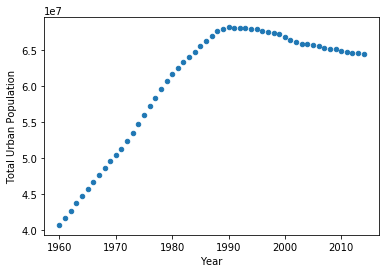

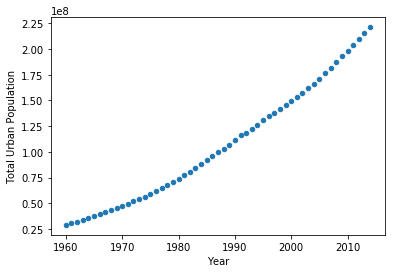

In [3]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
#fn = 'ind_pop_data.csv' DON'T HAVE THIS FILE
fn = 'world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')